In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

In [343]:
df = pd.read_csv("data.csv")

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,544000.0,3,1.50,1790,8203,1.5,0,1,3,1790,0,1910,2006,Seattle,WA 98116
1,568000.0,3,2.00,2350,5080,1.5,0,0,3,1780,570,1929,0,Seattle,WA 98118
2,840000.0,4,2.75,2600,2750,1.5,0,0,3,1620,980,1936,0,Seattle,WA 98109
3,435000.0,4,2.25,2140,6355,2.0,0,0,3,2140,0,2002,0,Snoqualmie,WA 98065
4,785000.0,3,2.00,2180,5440,1.0,0,0,5,1100,1080,1904,0,Seattle,WA 98103


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(3), int64(10), object(2)
memory usage: 539.2+ KB


In [345]:
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [346]:
df.drop(['statezip'], axis= 1, inplace=True)


In [347]:

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,544000.0,3,1,1790,8203,1,0,1,3,1790,0,1910,2006,Seattle
1,568000.0,3,2,2350,5080,1,0,0,3,1780,570,1929,0,Seattle
2,840000.0,4,2,2600,2750,1,0,0,3,1620,980,1936,0,Seattle
3,435000.0,4,2,2140,6355,2,0,0,3,2140,0,2002,0,Snoqualmie
4,785000.0,3,2,2180,5440,1,0,0,5,1100,1080,1904,0,Seattle


In [348]:
df.shape

(4600, 14)

In [350]:
# Removed 8 plus bedrooms
df=df[(df['bedrooms']>0) & (df['bedrooms']<8)]
df['bedrooms'].value_counts()

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
Name: bedrooms, dtype: int64

In [299]:
# sns.set_style('whitegrid') 
# plot=sns.lmplot(x ='yr_renovated', y ='price', data = df,col='city', hue ='city',height=5,col_wrap=5) 

In [300]:
df = df.drop(["statezip","city"],axis=1)

In [351]:
df.shape

(4595, 14)

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

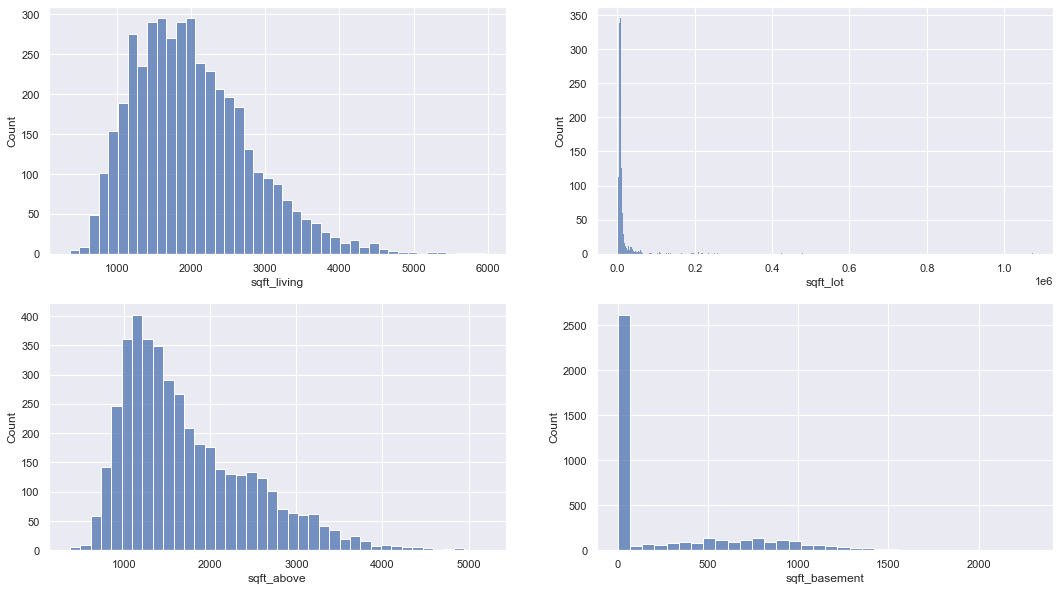

In [376]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], x= 'sqft_living', data= df)
sns.histplot(ax=axes[0, 1], x= 'sqft_lot', data= df)
sns.histplot(ax=axes[1, 0], x= 'sqft_above', data= df)
sns.histplot(ax=axes[1, 1], x= 'sqft_basement', data= df)

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

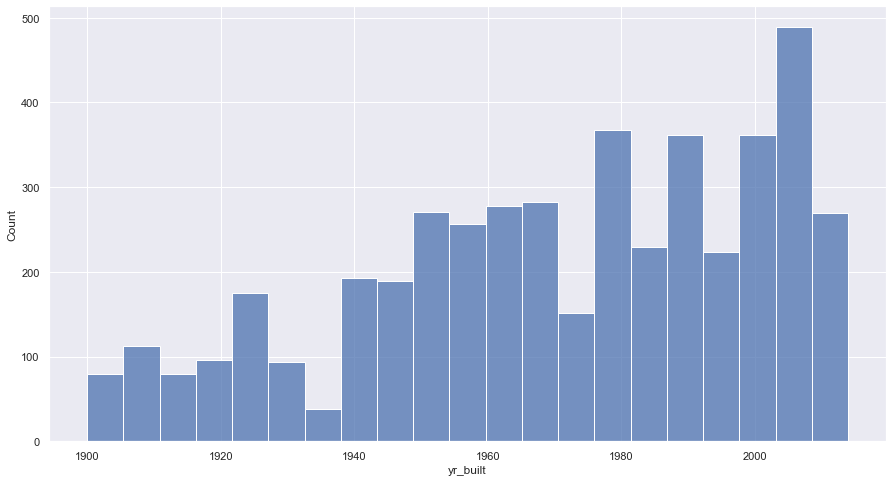

In [355]:
sns.histplot( x= 'yr_built', data= df)

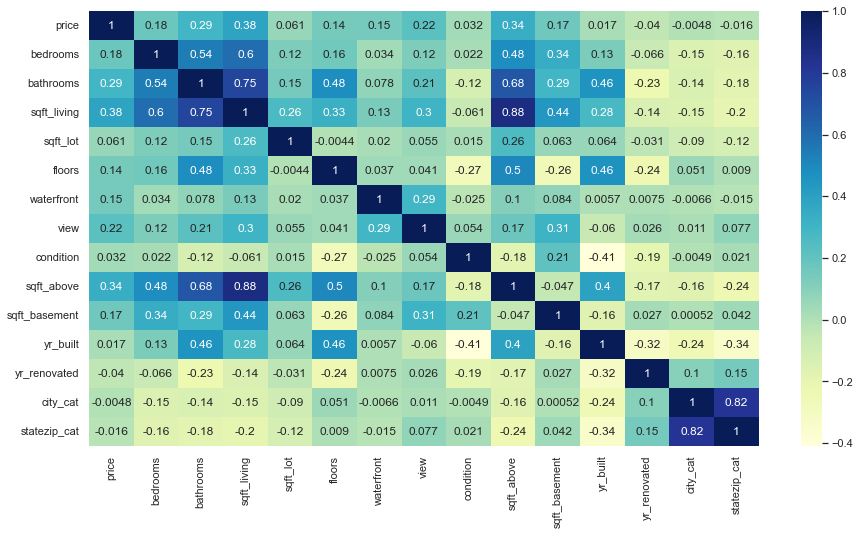

In [303]:
sns.set(rc = {'figure.figsize':(15,8)})

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

C:\Users\dando\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

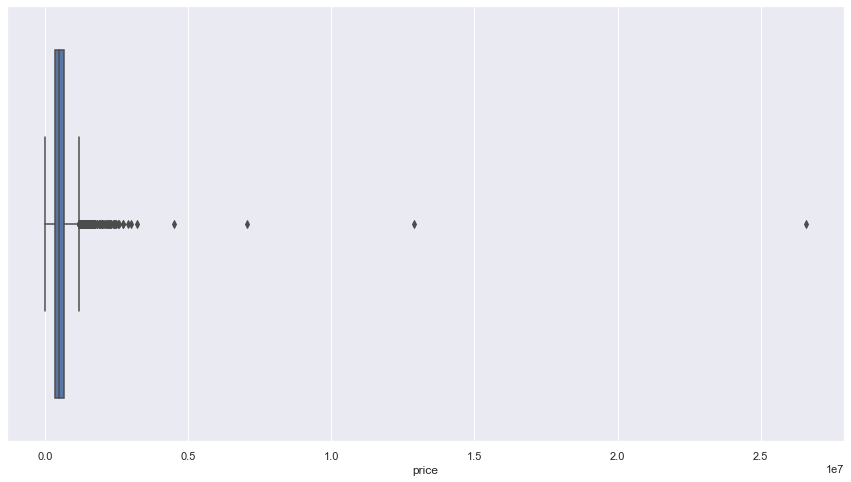

In [304]:
sns.boxplot(df['price'])

In [359]:
def remove_outliers(df, x):
    # Set Limits
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers  are removed\n')
    return df

In [360]:
df= remove_outliers(df, 'price')

Outliers  are removed



<AxesSubplot:>

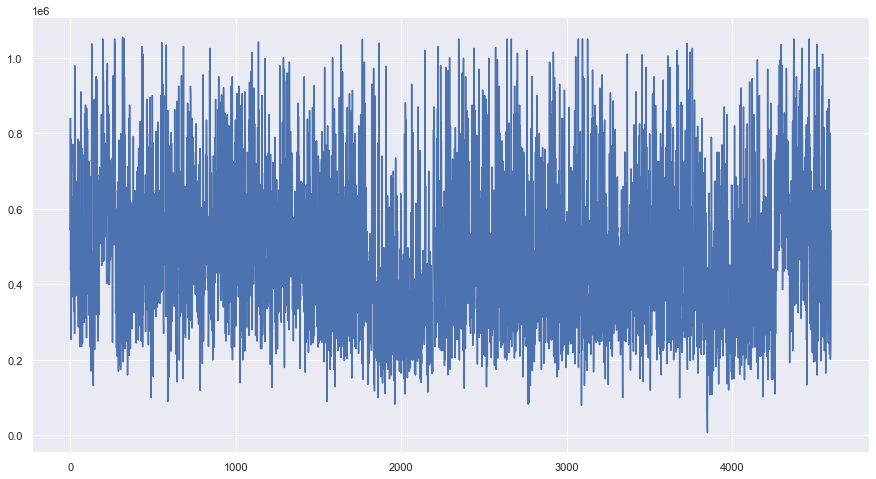

In [361]:
df.price.plot()

In [306]:
df['price']=df['price'].replace(0,df['price'].mean())


In [362]:
housedf=df
housedf= pd.get_dummies(df, drop_first=True)
housedf.head().T

,0,1,2,3,4
price,544000.0,568000.0,840000.0,435000.0,785000.0
bedrooms,3.0,3.0,4.0,4.0,3.0
bathrooms,1.0,2.0,2.0,2.0,2.0
sqft_living,1790.0,2350.0,2600.0,2140.0,2180.0
sqft_lot,8203.0,5080.0,2750.0,6355.0,5440.0
floors,1.0,1.0,1.0,2.0,1.0
waterfront,0.0,0.0,0.0,0.0,0.0
view,1.0,0.0,0.0,0.0,0.0
condition,3.0,3.0,3.0,3.0,5.0
sqft_above,1790.0,1780.0,1620.0,2140.0,1100.0


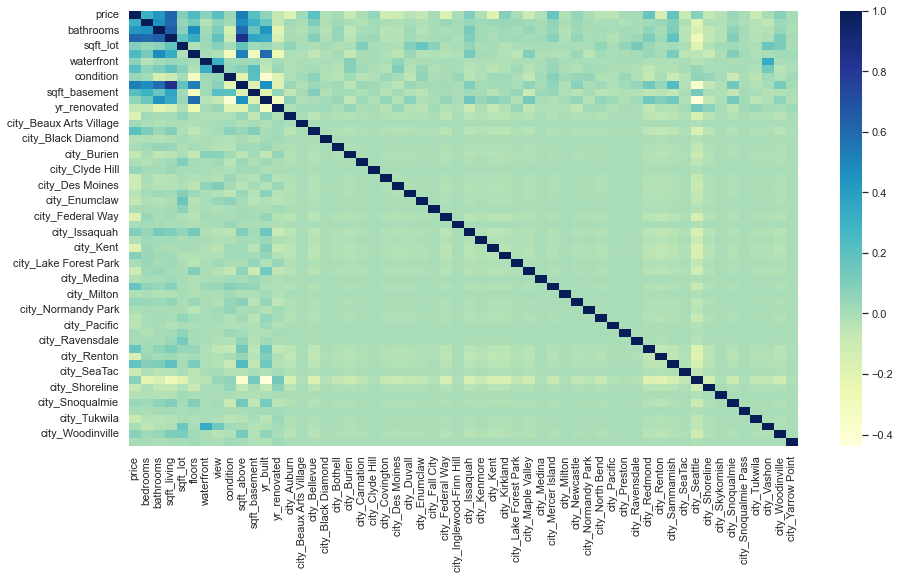

In [378]:
sns.set(rc = {'figure.figsize':(15,8)})

dataplot = sns.heatmap(housedf.corr(), cmap="YlGnBu", annot=False)

# Model Training 

In [ ]:
y= housedf.price.values

X = housedf.drop('price', axis =1).values

In [368]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [369]:
#Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [371]:
# importing module
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Training : ", lin_reg.score(X_train, y_train))
print("Testing  : ", lin_reg.score(X_test, y_test))

Training :  0.6909817733258194
Testing  :  -8.105726032494896e+21


In [374]:
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train, y_train)


print("Training acc  ", rf_reg.score(X_train, y_train))
print("Testing acc  ", rf_reg.score(X_test, y_test))

Training acc   0.9548218801913222
Testing acc   0.6989047819333258
